In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X, y = datasets.make_circles(n_samples=1000, factor=0.4, noise=0.1, random_state=42)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

DBSCAN()

In [ ]:
dbscan.core_sample_indices_

In [ ]:
dbscan.components_

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [ ]:
X_new = np.array([[-0.5, 1], [1,2], [-2,1], [0.1, -0.2]])
knn.predict(X_new)

array([0, 0, 0, 0])

In [ ]:
knn.predict_proba(X_new)

array([[1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([ 0, -1, -1,  0])

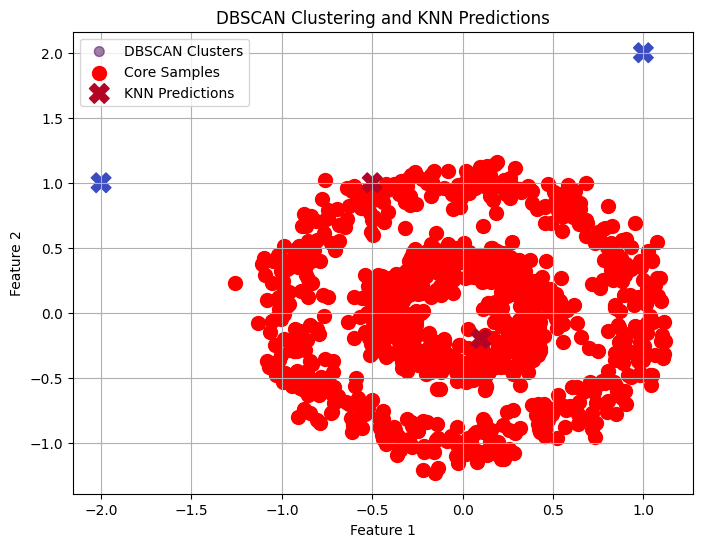

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis', marker='o', s=50, alpha=0.5, label='DBSCAN Clusters')
plt.scatter(X[dbscan.core_sample_indices_, 0], X[dbscan.core_sample_indices_, 1], c='red', marker='o', s=100, label='Core Samples')
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred.ravel(), cmap='coolwarm', marker='X', s=200, label='KNN Predictions')
plt.title('DBSCAN Clustering and KNN Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()